 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")

In [4]:
# Created a variable "whale_returns_df" and converted the dates to a DateTimeIndex.

whale_returns_df = pd.read_csv(whale_returns_path, index_col ='Date', infer_datetime_format = True, parse_dates = True)

whale_returns_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# Count nulls
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [6]:
# Drop nulls
whale_returns_df.dropna(inplace = True)

In [7]:
# whale_returns_df
whale_returns_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")

In [9]:
# Created a variable named "algo_returns_df" and convert the dates to a DateTimeIndex.

algo_returns_df = pd.read_csv(algo_returns_path, index_col ='Date', infer_datetime_format = True, parse_dates = True)

algo_returns_df.sort_index(ascending=True)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
# Count nulls
algo_returns_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [11]:
# Drop nulls
algo_returns_df.dropna(inplace = True)

In [12]:
# algo_returns_df
algo_returns_df.sort_index(ascending=True)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("Resources/sp_tsx_history.csv")

In [14]:
# Created a variable named "sp_tsx_history_df" and convert dates to a DateTimeIndex.

sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col = 'Date', infer_datetime_format = True, parse_dates = True)

sp_tsx_history_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [15]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [16]:
# checking nulls

sp_tsx_history_df.isnull()

,Close
Date,
2012-10-01,False
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
...,...
2019-12-20,False
2019-12-23,False
2019-12-24,False


In [17]:
# Determining the number of nulls

sp_tsx_history_df.isnull().sum()

Close    0
dtype: int64

In [18]:
# Dropped null

sp_tsx_history_df.dropna(inplace = True)

In [19]:
# Removed "$"

sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].replace({"\$":""}, regex = True)

sp_tsx_history_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"
...,...
2019-12-20,"17,118.44"
2019-12-23,"17,128.71"
2019-12-24,"17,180.15"


In [20]:
# Removed ","

sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].replace({",":""}, regex = True)

sp_tsx_history_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [21]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype(float)

# Rechecked dtypes for sp_tsx_history_df

sp_tsx_history_df.dtypes

# Initialized sp_tsx_history_df

sp_tsx_history_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [22]:
# Calculate Daily Returns
sp_tsx_returns_df = sp_tsx_history_df.pct_change()

# Intialized sp_tsx_returns

sp_tsx_returns_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [23]:
# Drop nulls
sp_tsx_returns_df.dropna(inplace = True)

# Initialized sp_tsx_returns

sp_tsx_returns_df.sort_index(ascending=True)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [24]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns_df = sp_tsx_returns_df.rename(columns = {"Close":"S&P TSX 60"})

# Initialized sp_tsx_returns

sp_tsx_returns_df.sort_index(ascending=True)

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [25]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_returns_df], axis="columns", join="inner")

# Initialized combined_df

combined_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

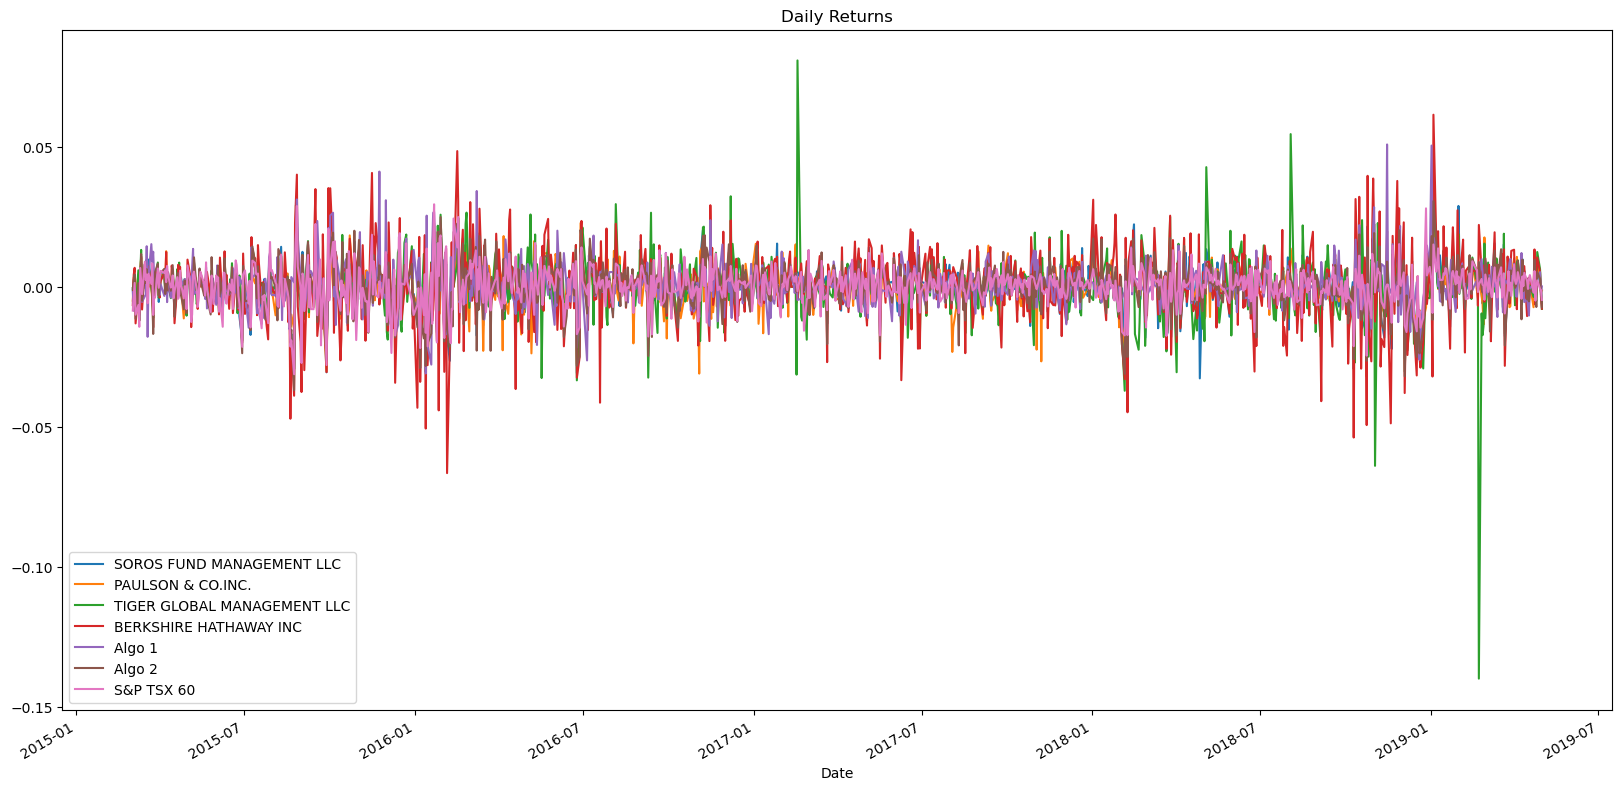

In [26]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

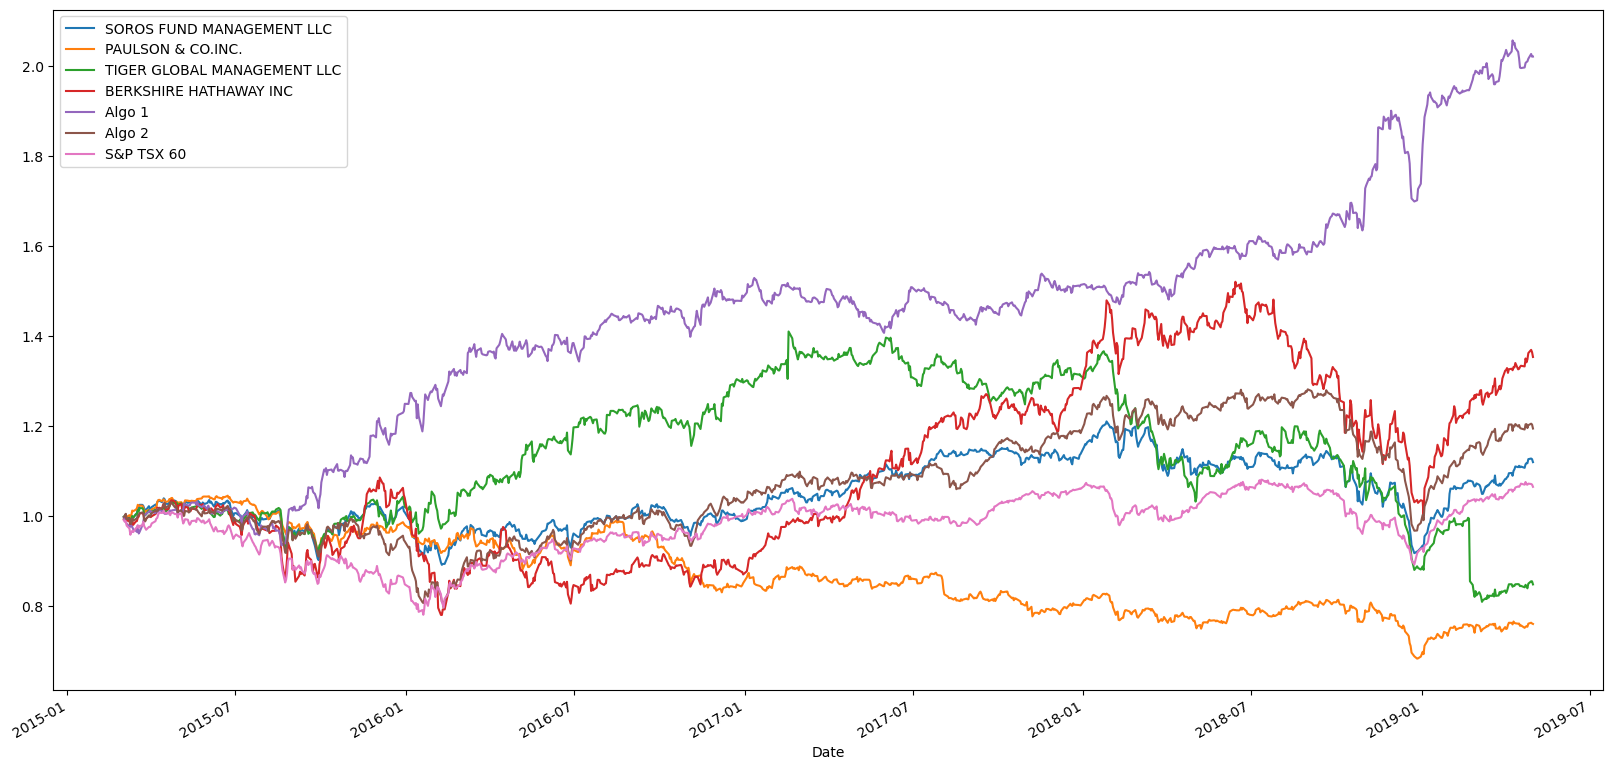

In [27]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + combined_df).cumprod()

# Plot cumulative returns

cumulative_returns_df.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


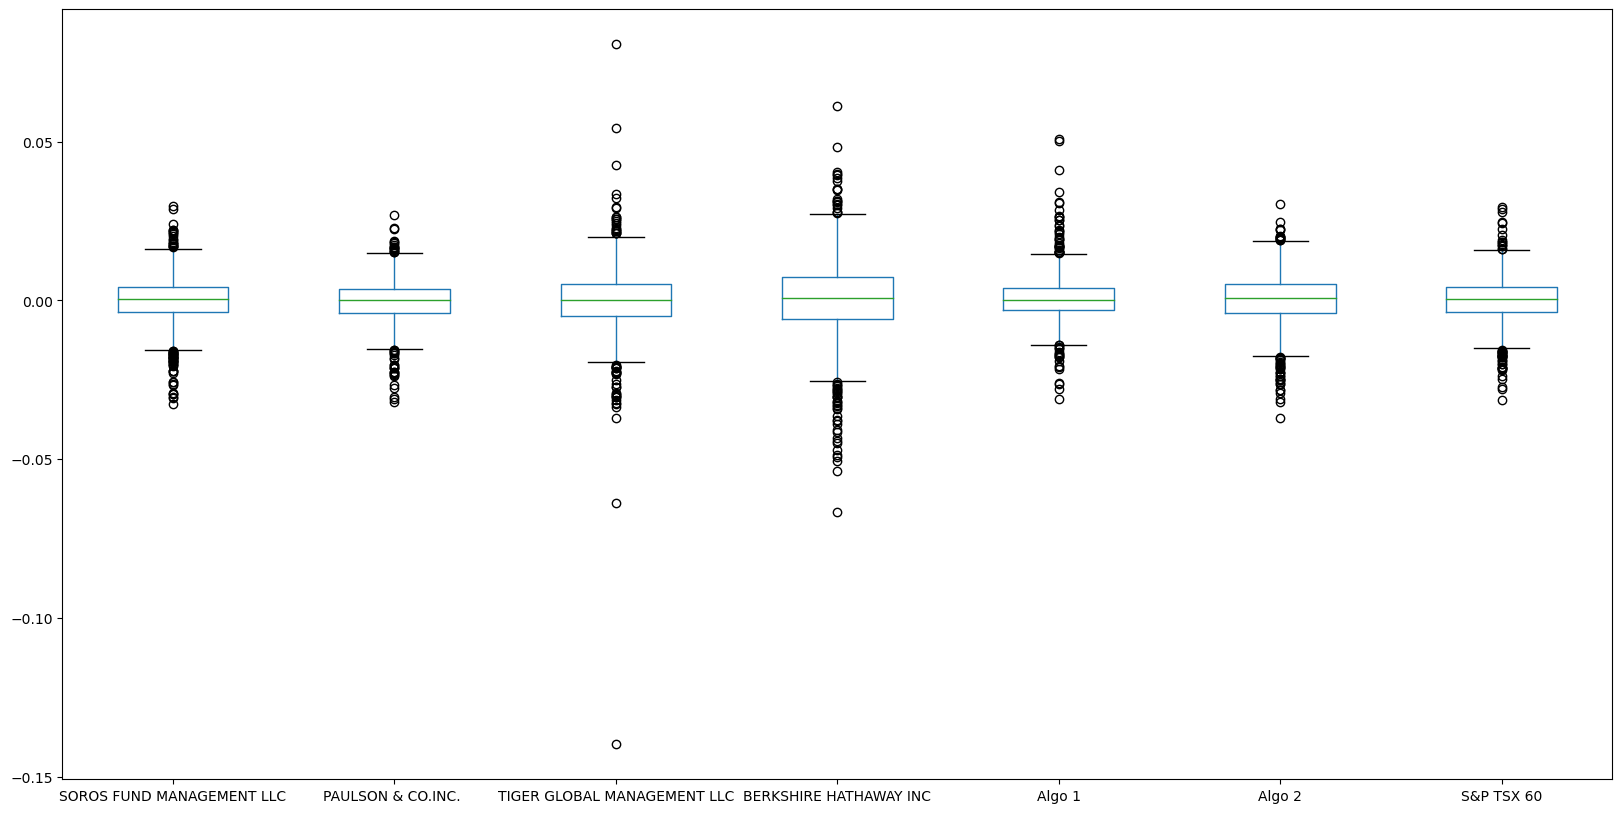

In [28]:
# Box plot to visually show risk
combined_boxplot_df = combined_df.boxplot(figsize = (20,10), grid = False)

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios
combined_std_df = combined_df.std()

combined_std_df.sort_values(ascending=False, inplace=True)

combined_std_df

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [30]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_returns_df = sp_tsx_returns_df.std()
# Determine which portfolios are riskier than the S&P TSX 60
combined_std_df > combined_std_df["S&P TSX 60"]

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
Algo 2                          True
SOROS FUND MANAGEMENT LLC       True
Algo 1                          True
S&P TSX 60                     False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [31]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_df = combined_df.std() * np.sqrt(252)

annual_std_df.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

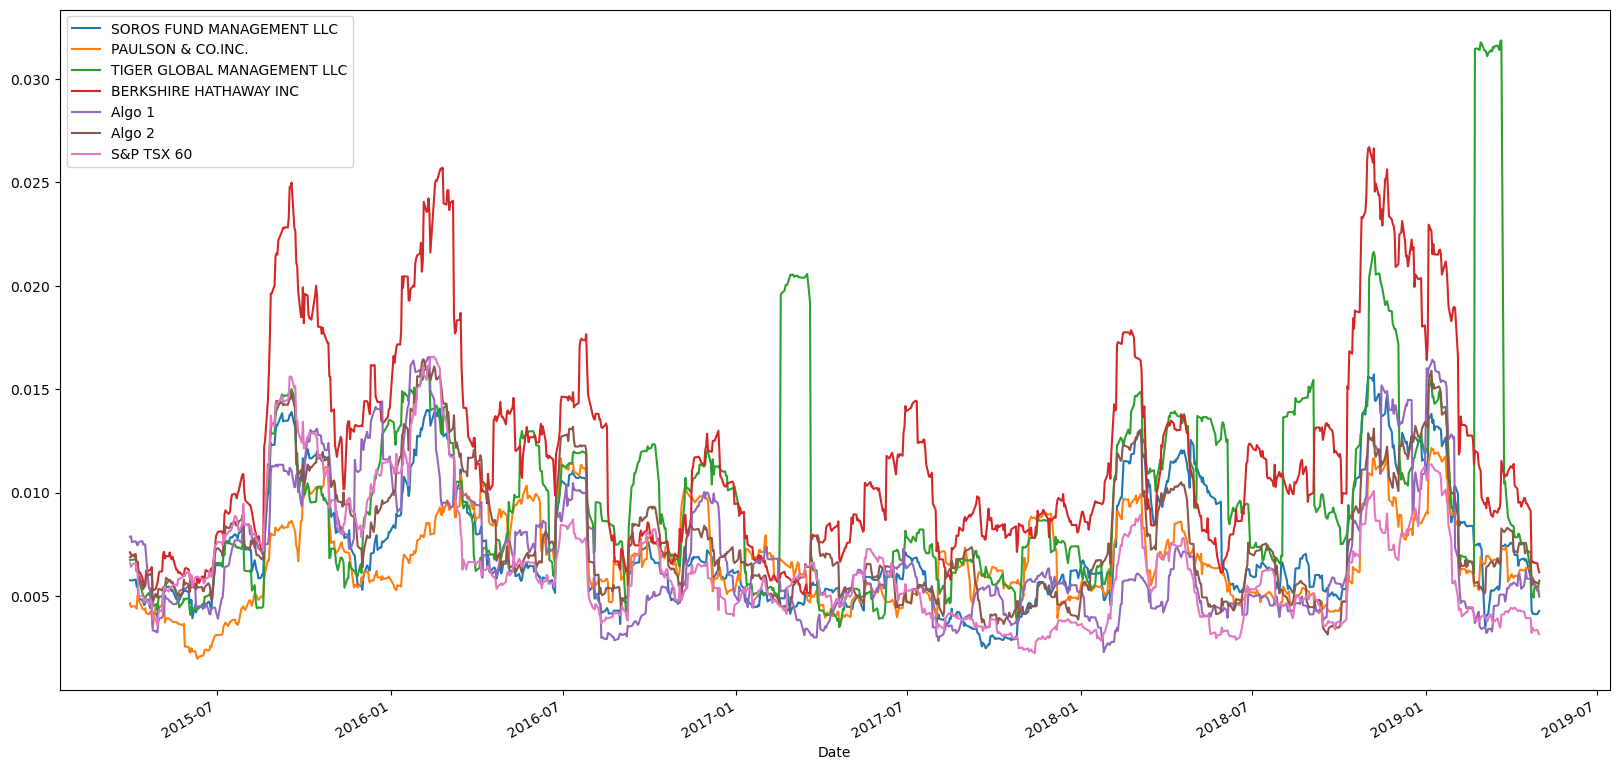

In [32]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

group_rolling_df = combined_df.rolling(window=21).std().plot(figsize = (20,10))


### Calculate and plot the correlation

<Axes: >

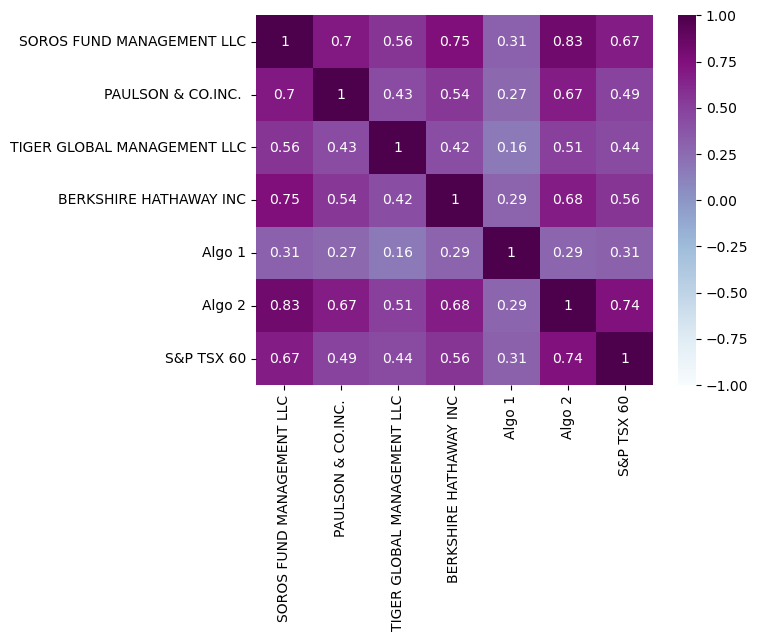

In [33]:
# Calculate the correlation

import seaborn as sns

correlation_df = combined_df.corr()

correlation_df

sns.heatmap(correlation_df, vmin = -1, vmax = 1, annot=True, cmap="BuPu") 


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: xlabel='Date'>

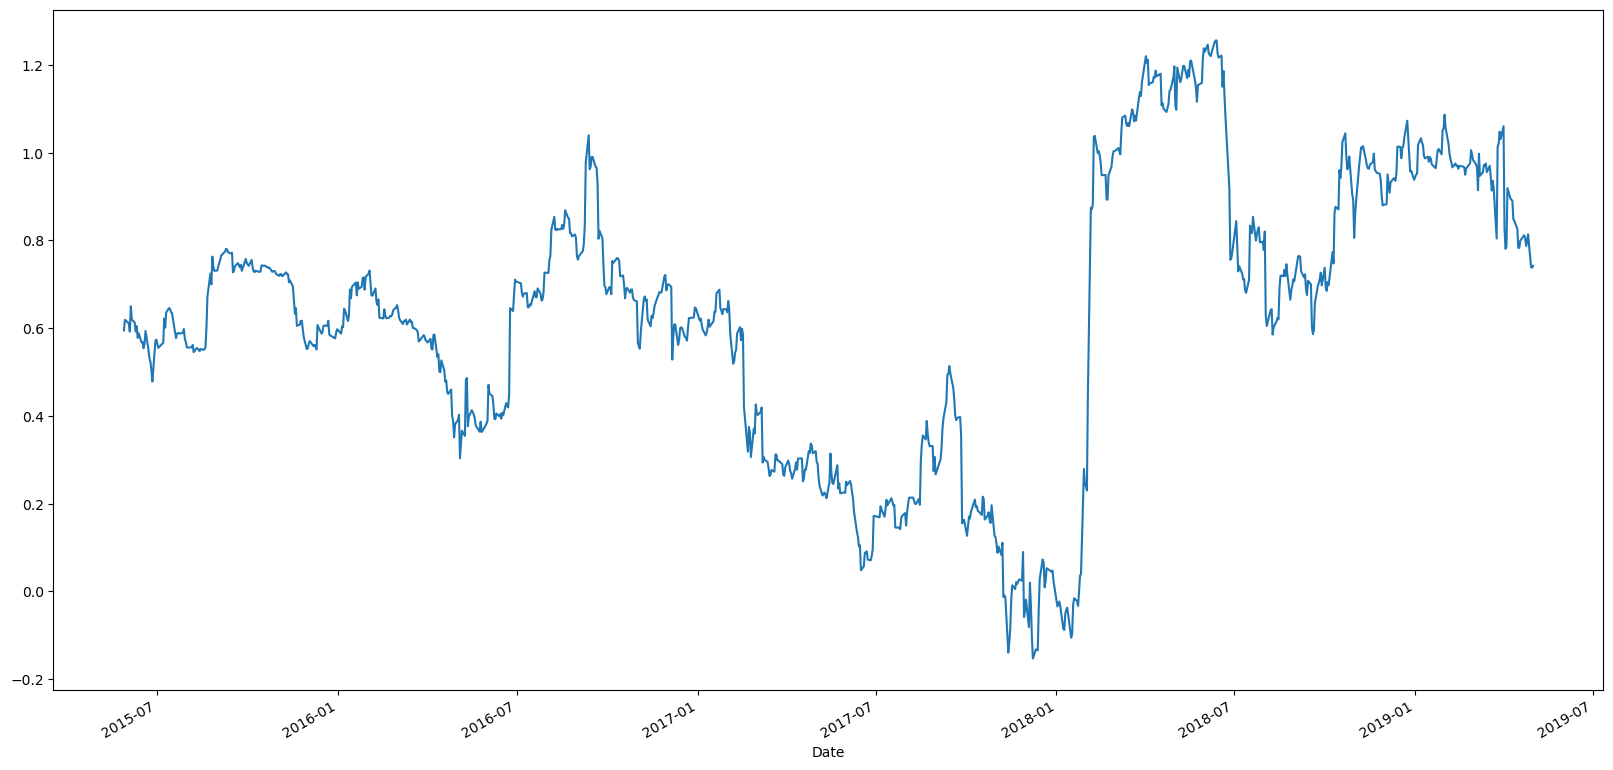

In [34]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend

rolling_covariance = combined_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window = 60).cov(combined_df["S&P TSX 60"])

rolling_variance = combined_df["S&P TSX 60"].rolling(window = 60).var()

rolling_combined_beta_df = rolling_covariance / rolling_variance

rolling_combined_beta_df.plot(figsize = (20,10)) 


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

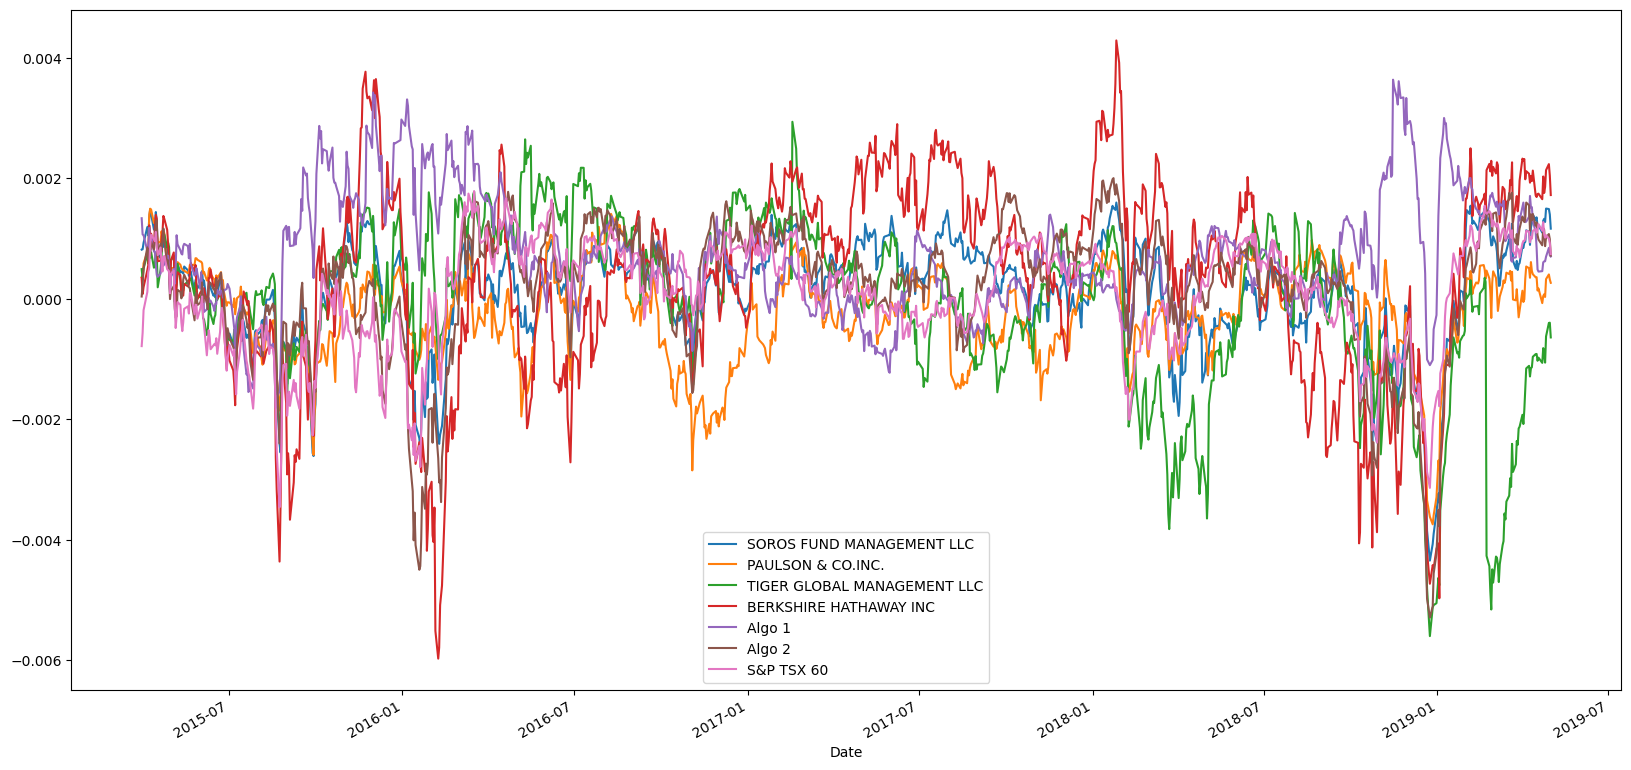

In [35]:
# Use `ewm` to calculate the rolling window

ewm = combined_df.ewm(min_periods = 21, halflife = 21).mean().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios
sharpe_ratios_df = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

sharpe_ratios_df

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<Axes: >

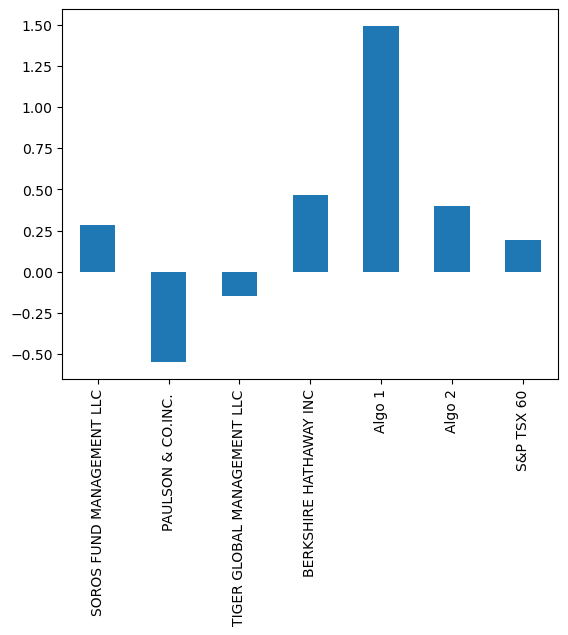

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_df.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

With respect to the sharp ratio value, Algo 1 outperform both the market (S&P60) and the whales portfolio. It has a value of more than one and is considered less riskier than it's counterparts.

The Algo 1 offers excess returns relative to its volatility as compared to the other stocks presented in the graph.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [38]:
# Reading data from 1st stock
shop_historical_path = Path("Resources/shop_historical.csv")

shop_df = pd.read_csv(shop_historical_path, index_col ='Date', infer_datetime_format = True, parse_dates = True)

shop_df.drop(columns=["Symbol"], inplace = True)

shop_df.rename(columns = {"Close":"SHOP"}, inplace=True)

shop_df.sort_index(ascending=True)

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [39]:
# Reading data from 2nd stock
otex_historical_path = Path("Resources/otex_historical.csv")

otex_df = pd.read_csv(otex_historical_path, index_col ='Date', infer_datetime_format = True, parse_dates = True)

otex_df.drop(columns=["Symbol"], inplace = True)

otex_df.rename(columns = {"Close":"OTEX"}, inplace=True)

otex_df.sort_index(ascending=True)

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [40]:
# Reading data from 3rd stock
l_historical_path = Path("Resources/l_historical.csv")

l_df = pd.read_csv(l_historical_path, index_col ='Date', infer_datetime_format = True, parse_dates = True)

l_df.drop(columns=["Symbol"], inplace = True)

l_df.rename(columns = {"Close":"l"}, inplace=True)

l_df.sort_index(ascending=True)

,l
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [41]:
# Combine all stocks in a single DataFrame
combined_custom_df = pd.concat([shop_df, otex_df, l_df], axis = 'columns', join = 'inner' )

In [42]:
# Reset Date index
combined_custom_df.sort_index(ascending=True)

,SHOP,OTEX,l
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [43]:
# Reorganize portfolio data by having a column per symbol


In [44]:
# Calculate daily returns
combined_custom_dreturns_df = combined_custom_df.pct_change()

# Drop NAs
combined_custom_df.dropna()

combined_custom_df.isnull().sum()
# Display sample data
combined_custom_df

,SHOP,OTEX,l
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_custom_wreturns_df = combined_custom_dreturns_df.dot(weights)

combined_custom_wreturns_df.sort_index(ascending=True)

# Display sample data
combined_custom_wreturns_df

Date
2018-01-02         NaN
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 501, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
super_combined_df = pd.concat([combined_custom_wreturns_df, combined_df], axis = 'columns', join = 'inner')

super_combined_df.rename(columns = {0:'SHOP/OTEX/l'}, inplace = True)


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
super_combined_df.dropna(inplace = True)

super_combined_df.isnull().sum()

super_combined_df.sort_index(ascending=True)

,SHOP/OTEX/l,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
super_combined_std = super_combined_df.std()*np.sqrt(252)

super_combined_std.sort_values(ascending= True, inplace=True)

super_combined_std

S&P TSX 60                     0.099121
PAULSON & CO.INC.              0.114343
Algo 1                         0.120028
Algo 2                         0.137664
SOROS FUND MANAGEMENT LLC      0.145675
TIGER GLOBAL MANAGEMENT LLC    0.219833
SHOP/OTEX/l                    0.224346
BERKSHIRE HATHAWAY INC         0.227445
dtype: float64

### Calculate and plot rolling `std` with 21-day window

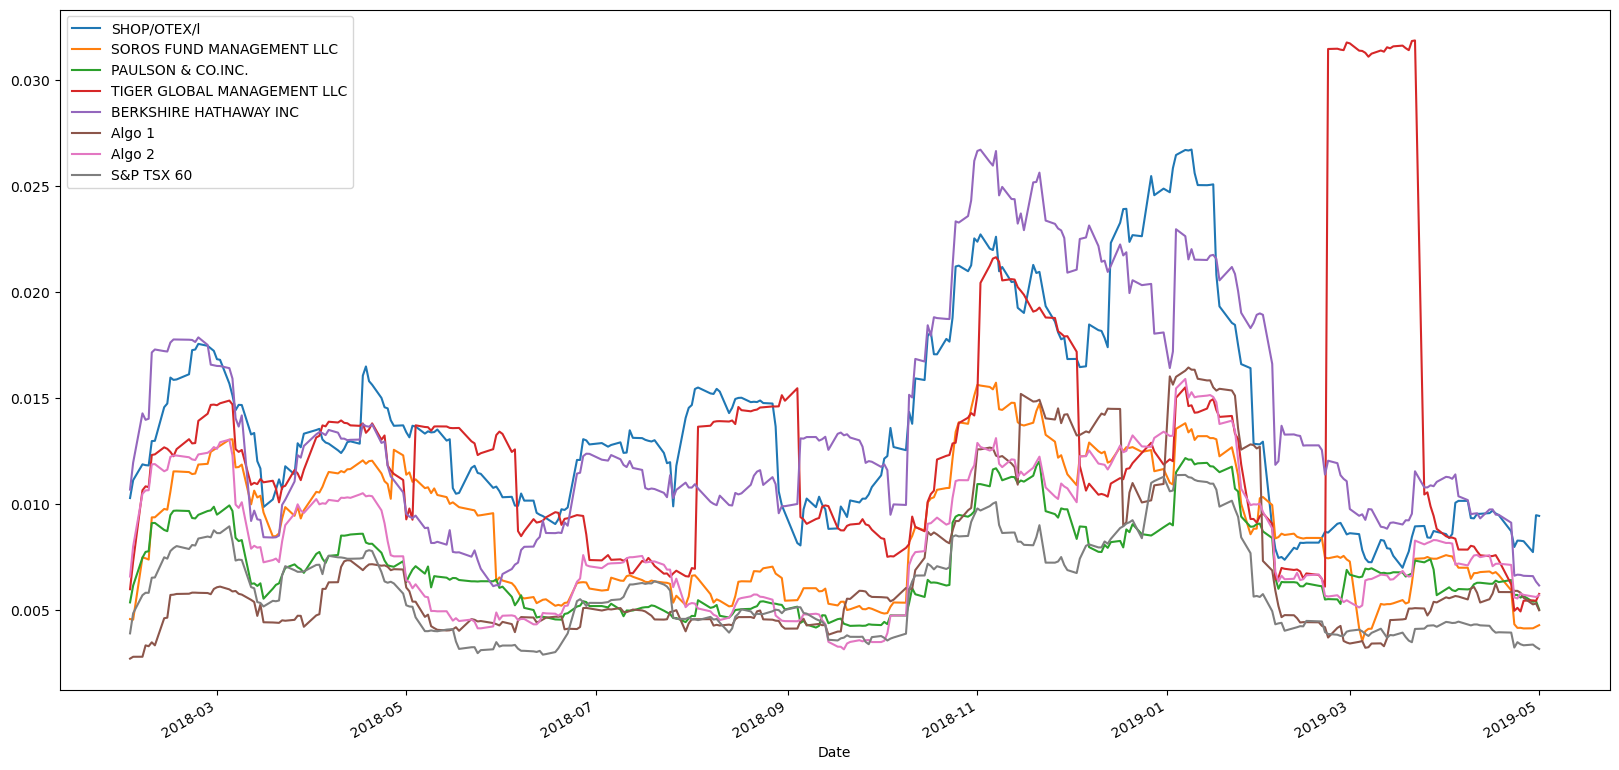

In [49]:
# Calculate rolling standard deviation
super_combined_rolling_df = super_combined_df.rolling(window=21).std().plot(figsize = (20,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

<Axes: >

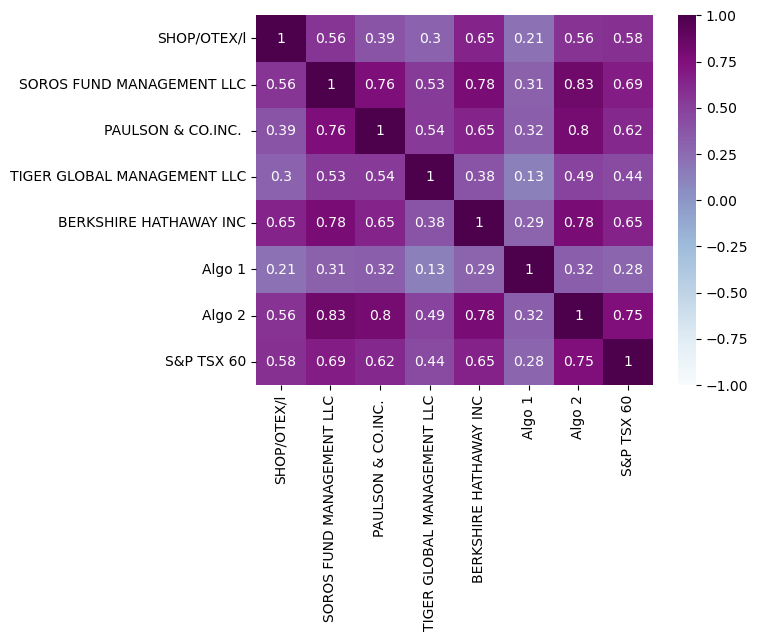

In [51]:
# Calculate and plot the correlation

custom_correlation_df = super_combined_df.corr()

custom_correlation_df

sns.heatmap(custom_correlation_df, vmin = -1, vmax = 1, annot=True, cmap="BuPu") 

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: xlabel='Date'>

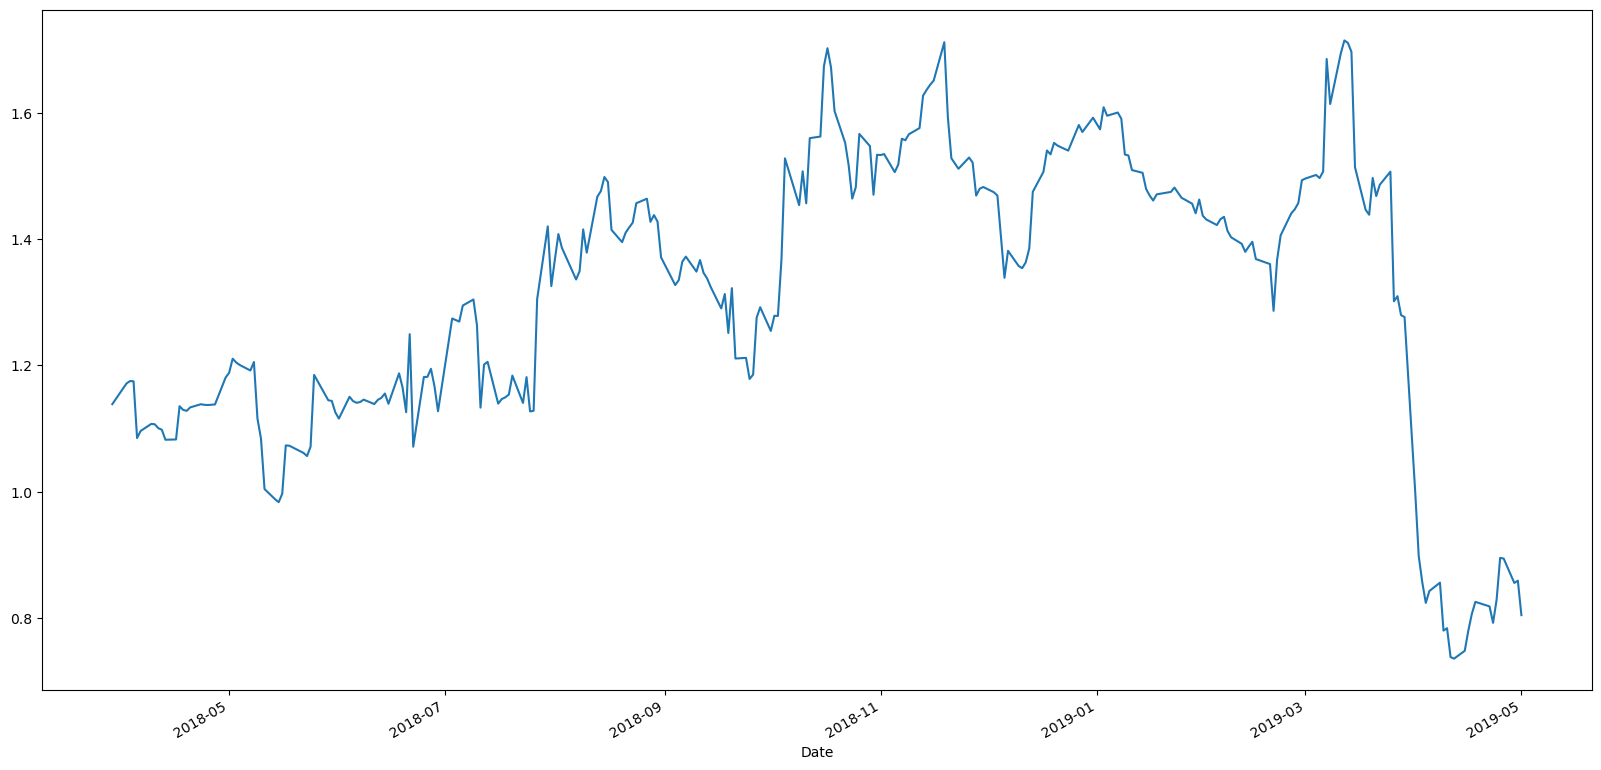

In [54]:
# Calculate and plot Beta

super_covariance = super_combined_df["SHOP/OTEX/l"].rolling(window = 60).cov(super_combined_df["S&P TSX 60"])

super_variance = super_combined_df["S&P TSX 60"].rolling(window = 60).var()

super_combined_beta = super_covariance / super_variance

super_combined_beta.plot(figsize = (20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Calculate Annualized Sharpe Ratios
super_sharpe_ratios = (super_combined_df.mean() * 252) / (super_combined_df.std() * np.sqrt(252))

super_sharpe_ratios

SHOP/OTEX/l                    1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
dtype: float64

<Axes: >

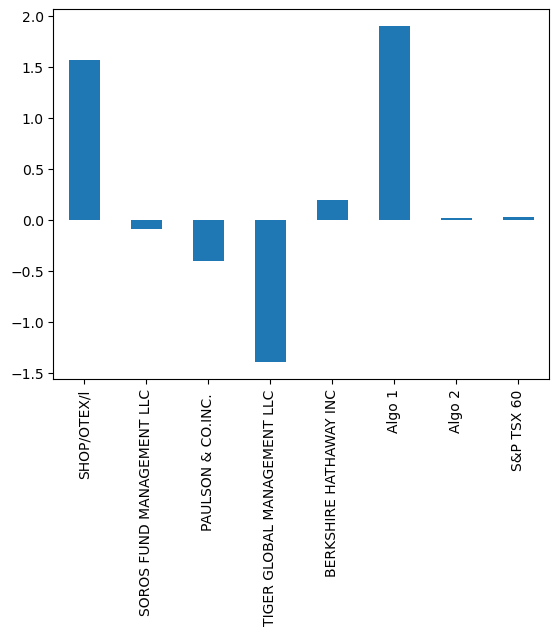

In [56]:
# Visualize the sharpe ratios as a bar plot
super_sharpe_ratios.plot(kind = "bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
The custom portfolio activity suggests that it is possible to make your own porfolio that can perform just as well as the algorithmic portfolio.

Carefully choosing 3 to 5 stocks for your portfolio will difenitely make a huge difference.

In this case, the combined portfolio produced a high sharpe value of more than 1 as compared to Soros Fund Managament LLC, Paulsonc & Co. INc., Tiger Global Management LLC, Berkshire Hathaway INC, Algo 2 and S&P60 stocks.

This value suggest that the custom portfolio is offering good returns relative to its volatility and is considered to be less riskier to the above mentioned stocks.

On the other hand, Algo 1 provides a higher value, less riskier, and is considered to be the best option in this situation.